# Получение номеров банковских карт
Очень важным типом фильтров являются так называемые регулярные выражения. В этом модуле мы ненадолго отойдем от построения рекомендательной системы, чтобы разобраться в работе регулярных выражений на нескольких примерах. Такого рода задачи будут часто встречаться вам при работе с данными любого типа:

Как найти номера банковских карт в списке транзакций
Отфильтровать список URL страниц по шаблону '/ и восемь цифр подряд'
Проверка корректности email-адресов
Подсчет статистики почтовых систем и выделение логинов пользователей из email-адресов
Фильтры, которые мы рассматривали в прошлых блоках, были относительно простыми: сравнения чисел, поиск подстроки. Более сложные условия и проверки задавали с помощью внешних функций. Однако, часто встречаются задачи, в которых необходимо внести дополнительные условия прямо в условие фильтра. Например, найти все слова, которые состоят из 16 цифр (т. е. нужно найти все номера банковских карт в тексте).

Для решения таких задач предназначены регулярные выражения. Это правила, которые позволяют задавать шаблоны поиска по строке (например, 16 цифр подряд). Если этот шаблон найден в строке, то она удовлетворяет регулярному выражению.

Многие системы аналитики и языки программирования имеют встроенные возможности по использованию регулярных выражений. Стоит помнить, что в каждой системе эти правила могут немного отличаться. Составлено большое число таблиц и сервисов, которые облегчают работу с регулярными выражениями. Например:

- Проверка регулярных выражений в питоне онлайн pyregex.com
- Короткая памятка по регулярным выражениям petefreitag.com/cheatsheets/regex/
- Длинная памятка rexegg.com/regex-quickstart.html

Допустим, нужно выделить из следующего текста номера карт из 16 цифр:

card number #1 1234123412341234

wrong number 9876

card number #1 4321432143214321

Согласно правилам регулярных выражений шаблон для 16 цифр будет выглядеть как "любая цифра, повторенная 16 раз". Что соответствует такой записи: \d{16}. Убедимся, что онлайн-проверка дает верный результат, т. е. находит номера 1234123412341234 и 4321432143214321 и исключает все остальные варианты. Воспользуемся интерфейсом pyregex.com

# Сложный фильтр для URL страниц
Файл с URL страниц URL.txt

Давайте рассмотрим как делать то же самое в своем коде на примере следующей задачи: имеется набор URL страниц проекта (файл URLs.txt). Нам необходимо выделить из этого списка страницы новостей, которые содержат восьмизначный номер новости. Т. е. нам нужны страницы вида '/world/36007585-tramp-pridumal-kak-reshit-ukrainskiy-vopros/?smi2=1', а другие страницы вроде '/politics/', '/latest/?page=1' и '/' нас не интересуют.

Такие задачи часто встречаются, когда в системах аналитики (например, Google Analytics) вам нужно получить статистику определенного раздела. Например, сколько просмотров страниц было у новостных текстов за период? С помощью регулярных выражений можно решить подобную задачу с помощью фильтра в одну строку.

Импортируем стандартную библиотеку для работы с регулярными выражениями:

In [1]:
import re

In [2]:
path_to_file = './module16_files/URLs.txt'

Теперь необходимо задать шаблон (т. е. правило для фильтра) для страниц вида /world/36007585-tramp-pridumal-kak-reshit-ukrainskiy-vopros/?smi2=1. Сформулируем его так: "любая последовательность символов, затем /, затем 8 цифр, затем тире и последовательность символов". Распишем эту последовательность в терминах регулярных выражений:

- .* - это любая последовательность символов (точка значит любой символ, * значит повторение прошлого символа любое количество раз). Итого .* - это последовательность любых символов (нулевой длины, кстати, тоже)
- / прямой слэш
- [0-9] любая цифра от 0 до 9 (кстати таким же способом можно задавать любую букву алфавита: [a-z])
- {8} количество повторений прошлого символа, т. е. в нашем случае цифры
- \- тире
- .* снова любое количество символов

Запишем наше выражение в шаблон:

In [5]:
pattern = re.compile('.*/\d{8}-.*')

with open(path_to_file) as f:
    for line in f:
        line = line.strip()
        if pattern.match(line):
            print(line)

/politics/36188461-s-marta-zhizn-rossiyan-suschestvenno-izmenitsya-iz-za-novyh-zakonov/
/world/36007585-tramp-pridumal-kak-reshit-ukrainskiy-vopros/
/science/36157853-nasa-sobiraet-ekstrennuyu-press-konferentsiyu-na-temu-vnezemnoy-zhizni/
/video/36001498-poyavilis-pervye-podrobnosti-gibeli-natali-melamed/
/world/36007585-tramp-pridumal-kak-reshit-ukrainskiy-vopros/?smi2=1
/middleeast/36131117-divizion-s-400-ne-zametil-ataki-f-35-pod-damaskom/
/economics/36065674-rossiyane-vozmutilis-minimalnymi-zarplatami-v-stranah-es/
/politics/36118047-otets-24-detey-potreboval-izvineniy-ot-soloveva/?smi2=1
/travel/36194479-v-sheremetevo-passazhiry-ustroili-bunt/
/politics/35638742-nesolidno-mariya-zaharova-sdelala-neozhidannoe-priznanie/
/video/36012692-tramp-otkrestilsya-ot-rossii-i-putina/
/starlife/36174817-guzeeva-rasstalas-s-muzhem/
/health/36149308-predlozheno-prostoe-sredstvo-ot-insulta/
/science/36139723-set-vzbudorazhila-novost-o-sensatsii-nasa/
/cis/36229699-poroshenko-obyavil-vseukrainski

# Проверка корректности email-адреса
Регулярные выражения позволяют не только фильтровать данные, но и извлекать полезные данные. В этом шаге мы извлечем название домена из списка email-адресов и построим распределение почтовых сервисов этой базы. Причем одновременно будем проверять корректность адреса.

В этом шаге мы будем работать с файлом 'email_base.csv', в котором записаны 1000 email-адресов в зашифрованном виде. Причем часть строк имеют "битые" адреса без домена. Нам необходимо для каждого адреса определить является ли он валидным, и выделить имя пользователя и домен.

In [42]:
import pandas as pd

%matplotlib inline

In [7]:
path_to_emails = './module16_files/email_base.csv'

emails = pd.read_csv(path_to_emails, sep='\t', names=['email'])

In [8]:
emails.head()

,email
0,e4534d1765b9868ee69560d22d4fbe
1,a6c00bcbc7@yandex.ru
2,a4cc52d0de@gmail.com
3,acbc8faa1c@gmail.com
4,70a1f9be47@yandex.ru


Сформулируем правило корректного email-адреса в нашей задаче следующим образом: "последовательность символов, точек или тире, затем @, затем последовательность символов и на конце '.ru' или '.com'". Реальные проверки для валидации корректности адреса более сложные, но в данном случае мы можем ограничиться такой.

Запишем сначала шаблон такой проверки только для адресов домена .ru:

In [23]:
pattern = '[\w\.-]+@\w+\.(ru|com)$'

In [24]:
if re.match(pattern, 'username-1990@gmail.ru'):
    print(True)

True


# Упражнение
(1 возможный балл)
Сейчас наша проверка имеет недостаток: в ней идет проверка на наличие домена .ru и .com, однако, проверку пройдет и такой адрес:

In [25]:
if re.match(pattern, 'username-1990@gmail.com123'):
    print(True)

Как следует изменить шаблон pattern, чтобы исключить такие случаи?

# Статистика почтовых систем
Итак, наш шаблон проверки работает. Давайте решим следующую задачу: необходимо посчитать количество адресов в файле email_base.csv в разбивке по почтовым доменам. Т. е. посчитать сколько адресов принадлежат yandex.ru, сколько - gmail.com итд. А если адрес не похож на email, то необходимо посчитать количество таких строк как 'wrong email'

Для решения этой задачи сначала выделим имя пользователя и домен. Для этого укажем эти email-адреса части в скобках шаблона регулярного выражения:

In [26]:
pattern = '([\w\.-]+)@([\w]+\.(ru|com))'

In [36]:
[re.search(pattern, 'username@yandex.ru').group(i) for i in range(4)]

['username@yandex.ru', 'username', 'yandex.ru', 'ru']

In [37]:
def get_email_domain(row):
    if re.match(pattern, row['email']):
        return re.search(pattern, row['email']).group(2)
    else:
        return 'wrong email'

In [39]:
emails['domain'] = emails.apply(get_email_domain, axis=1)

In [41]:
emails.head()

,email,domain
0,e4534d1765b9868ee69560d22d4fbe,wrong email
1,a6c00bcbc7@yandex.ru,yandex.ru
2,a4cc52d0de@gmail.com,gmail.com
3,acbc8faa1c@gmail.com,gmail.com
4,70a1f9be47@yandex.ru,yandex.ru


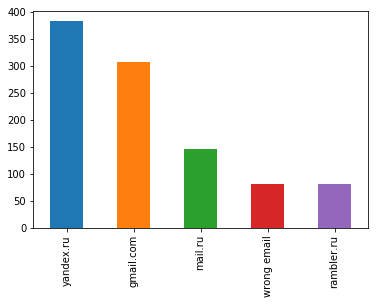

In [45]:
emails['domain'].value_counts().plot(kind='bar');

In [46]:
emails['domain'].value_counts()

yandex.ru      383
gmail.com      307
mail.ru        147
wrong email     82
rambler.ru      81
Name: domain, dtype: int64

# Выделение email-адресов из текста
Регулярные выражения дают еще одну крайне полезную возможность выделить все шаблоны в тексте. Давайте получим из следующего текста адреса электронной почты:

In [76]:
path_to_file = './module16_files/emails_from_text.txt'

pattern = '([\w\.-]+@([\w]+)(\.ru|\.com))'

In [54]:
with open(path_to_file, encoding='utf-8') as f:
    text = f.read()

In [77]:
for address in re.findall(pattern, text):
    print(address[1])

yandex
gmail
rambler
